In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



spamData = pd.read_csv("SMSSpamCollection", sep="\t", names=["label", "message"])
spamData.describe()
spamData

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [76]:
spamData['length'] = spamData['message'].apply(len)
spamData.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb338087da0>,
      dtype=object)

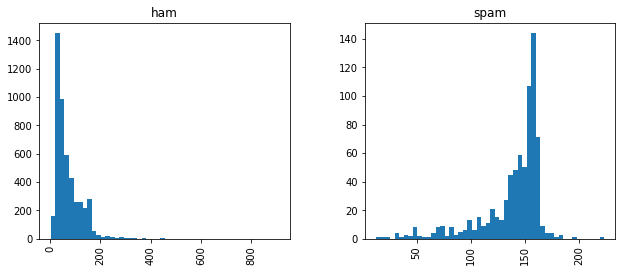

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
spamData.hist(column='length', by='label', bins=50,figsize=(10,4))


In [84]:
# # split dataset into inputs and target (Our class that we are looking for, in this case = y)

X = spamData['label']
y = spamData['message']
len(spamData)

5572

In [31]:
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# representing strings as numbers for feature extraction
# --> involves converting data to lowercase and removing all punctuation marks..
vectorizer = CountVectorizer()
tfid_tr = TfidfTransformer(use_idf=True)

vectorized_y = vectorizer.fit_transform(spamData.message)
vectorized_y_tf = tfid_tr.fit_transform(vectorized_X)

vectorized_y_tf.shape


(5572, 8713)

In [106]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

scores = cross_val_score(clf, vectorized_y_tf, spamData["label"], cv=10, n_jobs=-1)
scores.mean()

0.9632072739908496

In [107]:
# knn classifier
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knn_scores = cross_val_score(model, vectorized_y_tf, spamData['label'],cv=10 )
knn_scores.mean()


0.9111632336570079